In [1]:
#Data manipulation
import pandas as pd
import numpy as np


#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches
from yellowbrick.regressor import ResidualsPlot, PredictionError
from yellowbrick.model_selection import FeatureImportances
%matplotlib inline
plt.style.use('seaborn')


#Modeling
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


sns.set_style('whitegrid', {"font.family":['serif']})
sns.set_context('talk')

### EDA

In [2]:
wine_quality = pd.read_csv("wine_quality 1.csv")

In [3]:
wine_quality.head(5)

,Type,Fixed_Acidity,Volatile_Acidity,Citric_acid,Residual_sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_quality.shape

(6497, 13)

In [5]:
# Check unique values for Type and Quality to see how many different types of wines and check the ratings
print("Wine Types:", wine_quality.Type.unique())
print("Wine Quality Ratings:", wine_quality.Quality.unique())


Wine Types: ['white' 'red']
Wine Quality Ratings: [6 5 7 8 4 3 9]


In [6]:
#Count number of red and white wine 
wine_quality.Type.value_counts()


white    4898
red      1599
Name: Type, dtype: int64

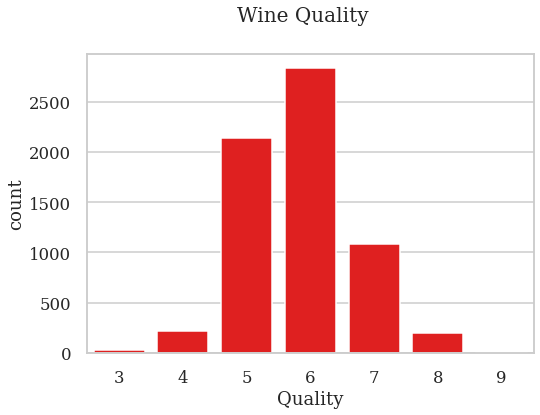

In [7]:
# Plot Quality distribution for all types of wine

sns.countplot( x ='Quality', data = wine_quality, color ='red')
plt.suptitle('Wine Quality', x=.50, y=1., fontsize=20);  




#Most wine ranked betwen 5 - 7 score

In [8]:
# Check if any data is missing. Some of the columns are missing datas but not much. 
# pH column has most data missing with total 11 data points


wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  6497 non-null   object 
 1   Fixed_Acidity         6487 non-null   float64
 2   Volatile_Acidity      6489 non-null   float64
 3   Citric_acid           6494 non-null   float64
 4   Residual_sugar        6495 non-null   float64
 5   Chlorides             6495 non-null   float64
 6   Free_Sulfur_Dioxide   6497 non-null   float64
 7   Total_Sulfur_Dioxide  6497 non-null   float64
 8   Density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  Sulphates             6493 non-null   float64
 11  Alcohol               6497 non-null   float64
 12  Quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
#All numerical columns will give provide data detials with desribe. 
wine_quality.describe()

,Fixed_Acidity,Volatile_Acidity,Citric_acid,Residual_sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
# Fill empty cells with "zero" value. Since missing data is not significant, all empty cell are filled with zero.  

wine_quality = wine_quality.fillna(0)

In [11]:
wine_quality. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  6497 non-null   object 
 1   Fixed_Acidity         6497 non-null   float64
 2   Volatile_Acidity      6497 non-null   float64
 3   Citric_acid           6497 non-null   float64
 4   Residual_sugar        6497 non-null   float64
 5   Chlorides             6497 non-null   float64
 6   Free_Sulfur_Dioxide   6497 non-null   float64
 7   Total_Sulfur_Dioxide  6497 non-null   float64
 8   Density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  Sulphates             6497 non-null   float64
 11  Alcohol               6497 non-null   float64
 12  Quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [12]:
#Check Correlaiton of each column 

wine_quality.corr()

,Fixed_Acidity,Volatile_Acidity,Citric_acid,Residual_sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
Fixed_Acidity,1.000000,0.212576,0.320668,-0.110573,0.292623,-0.274535,-0.322457,0.448739,-0.168988,0.293984,-0.093488,-0.074060
Volatile_Acidity,0.212576,1.000000,-0.377545,-0.194984,0.376288,-0.352004,-0.414812,0.270759,0.211092,0.221506,-0.037229,-0.265671
Citric_acid,0.320668,-0.377545,1.000000,0.141796,0.038836,0.132757,0.194515,0.095693,-0.266023,0.059221,-0.009973,0.085780
Residual_sugar,-0.110573,-0.194984,0.141796,1.000000,-0.129072,0.402610,0.495294,0.552498,-0.211736,-0.184451,-0.359276,-0.037087
Chlorides,0.292623,0.376288,0.038836,-0.129072,1.000000,-0.194886,-0.279562,0.362519,0.037356,0.393436,-0.256871,-0.200278
Free_Sulfur_Dioxide,-0.274535,-0.352004,0.132757,0.402610,-0.194886,1.000000,0.720934,0.025717,-0.115421,-0.187733,-0.179838,0.055463
Total_Sulfur_Dioxide,-0.322457,-0.414812,0.194515,0.495294,-0.279562,0.720934,1.000000,0.032395,-0.187053,-0.273385,-0.265740,-0.041385
Density,0.448739,0.270759,0.095693,0.552498,0.362519,0.025717,0.032395,1.000000,0.011482,0.258008,-0.686745,-0.305858
pH,-0.168988,0.211092,-0.266023,-0.211736,0.037356,-0.115421,-0.187053,0.011482,1.000000,0.148389,0.099930,0.013723
Sulphates,0.293984,0.221506,0.059221,-0.184451,0.393436,-0.187733,-0.273385,0.258008,0.148389,1.000000,-0.003263,0.039987


In [13]:
# Checking Quality correlation with all other features and print Ascending from most Correlated to least correlated

quality_corr = wine_quality.corr()['Quality'].drop('Quality').sort_values(ascending = False)
quality_corr


Alcohol                 0.444319
Citric_acid             0.085780
Free_Sulfur_Dioxide     0.055463
Sulphates               0.039987
pH                      0.013723
Residual_sugar         -0.037087
Total_Sulfur_Dioxide   -0.041385
Fixed_Acidity          -0.074060
Chlorides              -0.200278
Volatile_Acidity       -0.265671
Density                -0.305858
Name: Quality, dtype: float64

In [14]:
#Stats model to complete fit. There is very high chance of multicollinearity


y, X = patsy.dmatrices('Quality ~ Fixed_Acidity + Volatile_Acidity + Citric_acid + Residual_sugar + Chlorides + Free_Sulfur_Dioxide + Total_Sulfur_Dioxide + pH + Sulphates + Alcohol', 
                       data=wine_quality, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Quality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     264.6
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:15:20   Log-Likelihood:                -7226.2
No. Observations:                6497   AIC:                         1.447e+04
Df Residuals:                    6486   BIC:                         1.455e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.2273      0.219     10.158      0.000       1.797       2.657
Fixed_Acidity            0.0066      0.009      0.752      0.452      -0.011       0.024
Volatile_Acidity        -1.4331      0.072    -20.034      0.000      -1.573      -1.293
Citric_acid             -0.1213      0.079     -1.529      0.126      -0.277       0.034
Residual_sugar           0.0223      0.002      9.519      0.000       0.018       0.027
Chlorides               -0.8123      0.325     -2.496      0.013      -1.450      -0.174
Free_Sulfur_Dioxide      0.0061      0.001      8.066      0.000       0.005       0.008
Total_Sulfur_Dioxide    -0.0023      0.000     -8.567      0.000      -0.003      -0.002
pH                       0.0796      0.050      1.593      0.111      -0.018       0.178
Sulphates                0.6684      0.070      9.562      0.000       0.531       0.805
Alcohol                  0.3303      0.009     36.348      0.000       0.312       0.348
==============================================================================
Omnibus:                      138.648   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.637
Skew:                           0.012   Prob(JB):                     2.60e-67
Kurtosis:                       4.064   Cond. No.                     4.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
"""Since my model with both red and white wines has low R^2 I am seperating my data to red and wines. 
I would like to see if there is any significant changes to my R^2"""


red_wine_df = wine_quality[wine_quality.Type !='white']
white_wine_df = wine_quality[wine_quality.Type !='red']

red_wine_df.head(5)

,Type,Fixed_Acidity,Volatile_Acidity,Citric_acid,Residual_sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
4898,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4899,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
4900,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4901,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4902,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
red_wine_df.shape

(1599, 13)

In [17]:
#Quality correlation to other features for red wine df

red_wine_df_corr = red_wine_df.corr()["Quality"].drop("Quality").sort_values(ascending = False)
red_wine_df_corr

Alcohol                 0.476166
Sulphates               0.252802
Citric_acid             0.226373
Fixed_Acidity           0.123063
Residual_sugar          0.013732
pH                     -0.041858
Free_Sulfur_Dioxide    -0.050656
Chlorides              -0.128907
Density                -0.174919
Total_Sulfur_Dioxide   -0.185100
Volatile_Acidity       -0.390604
Name: Quality, dtype: float64

In [18]:
#Quality correlation to other features for white wine df

white_wine_df_corr = white_wine_df.corr()["Quality"].drop("Quality").sort_values(ascending = False)
white_wine_df_corr

Alcohol                 0.435575
pH                      0.073968
Sulphates               0.054229
Free_Sulfur_Dioxide     0.008158
Citric_acid            -0.008698
Residual_sugar         -0.097687
Fixed_Acidity          -0.106410
Total_Sulfur_Dioxide   -0.174737
Volatile_Acidity       -0.194361
Chlorides              -0.209049
Density                -0.307123
Name: Quality, dtype: float64

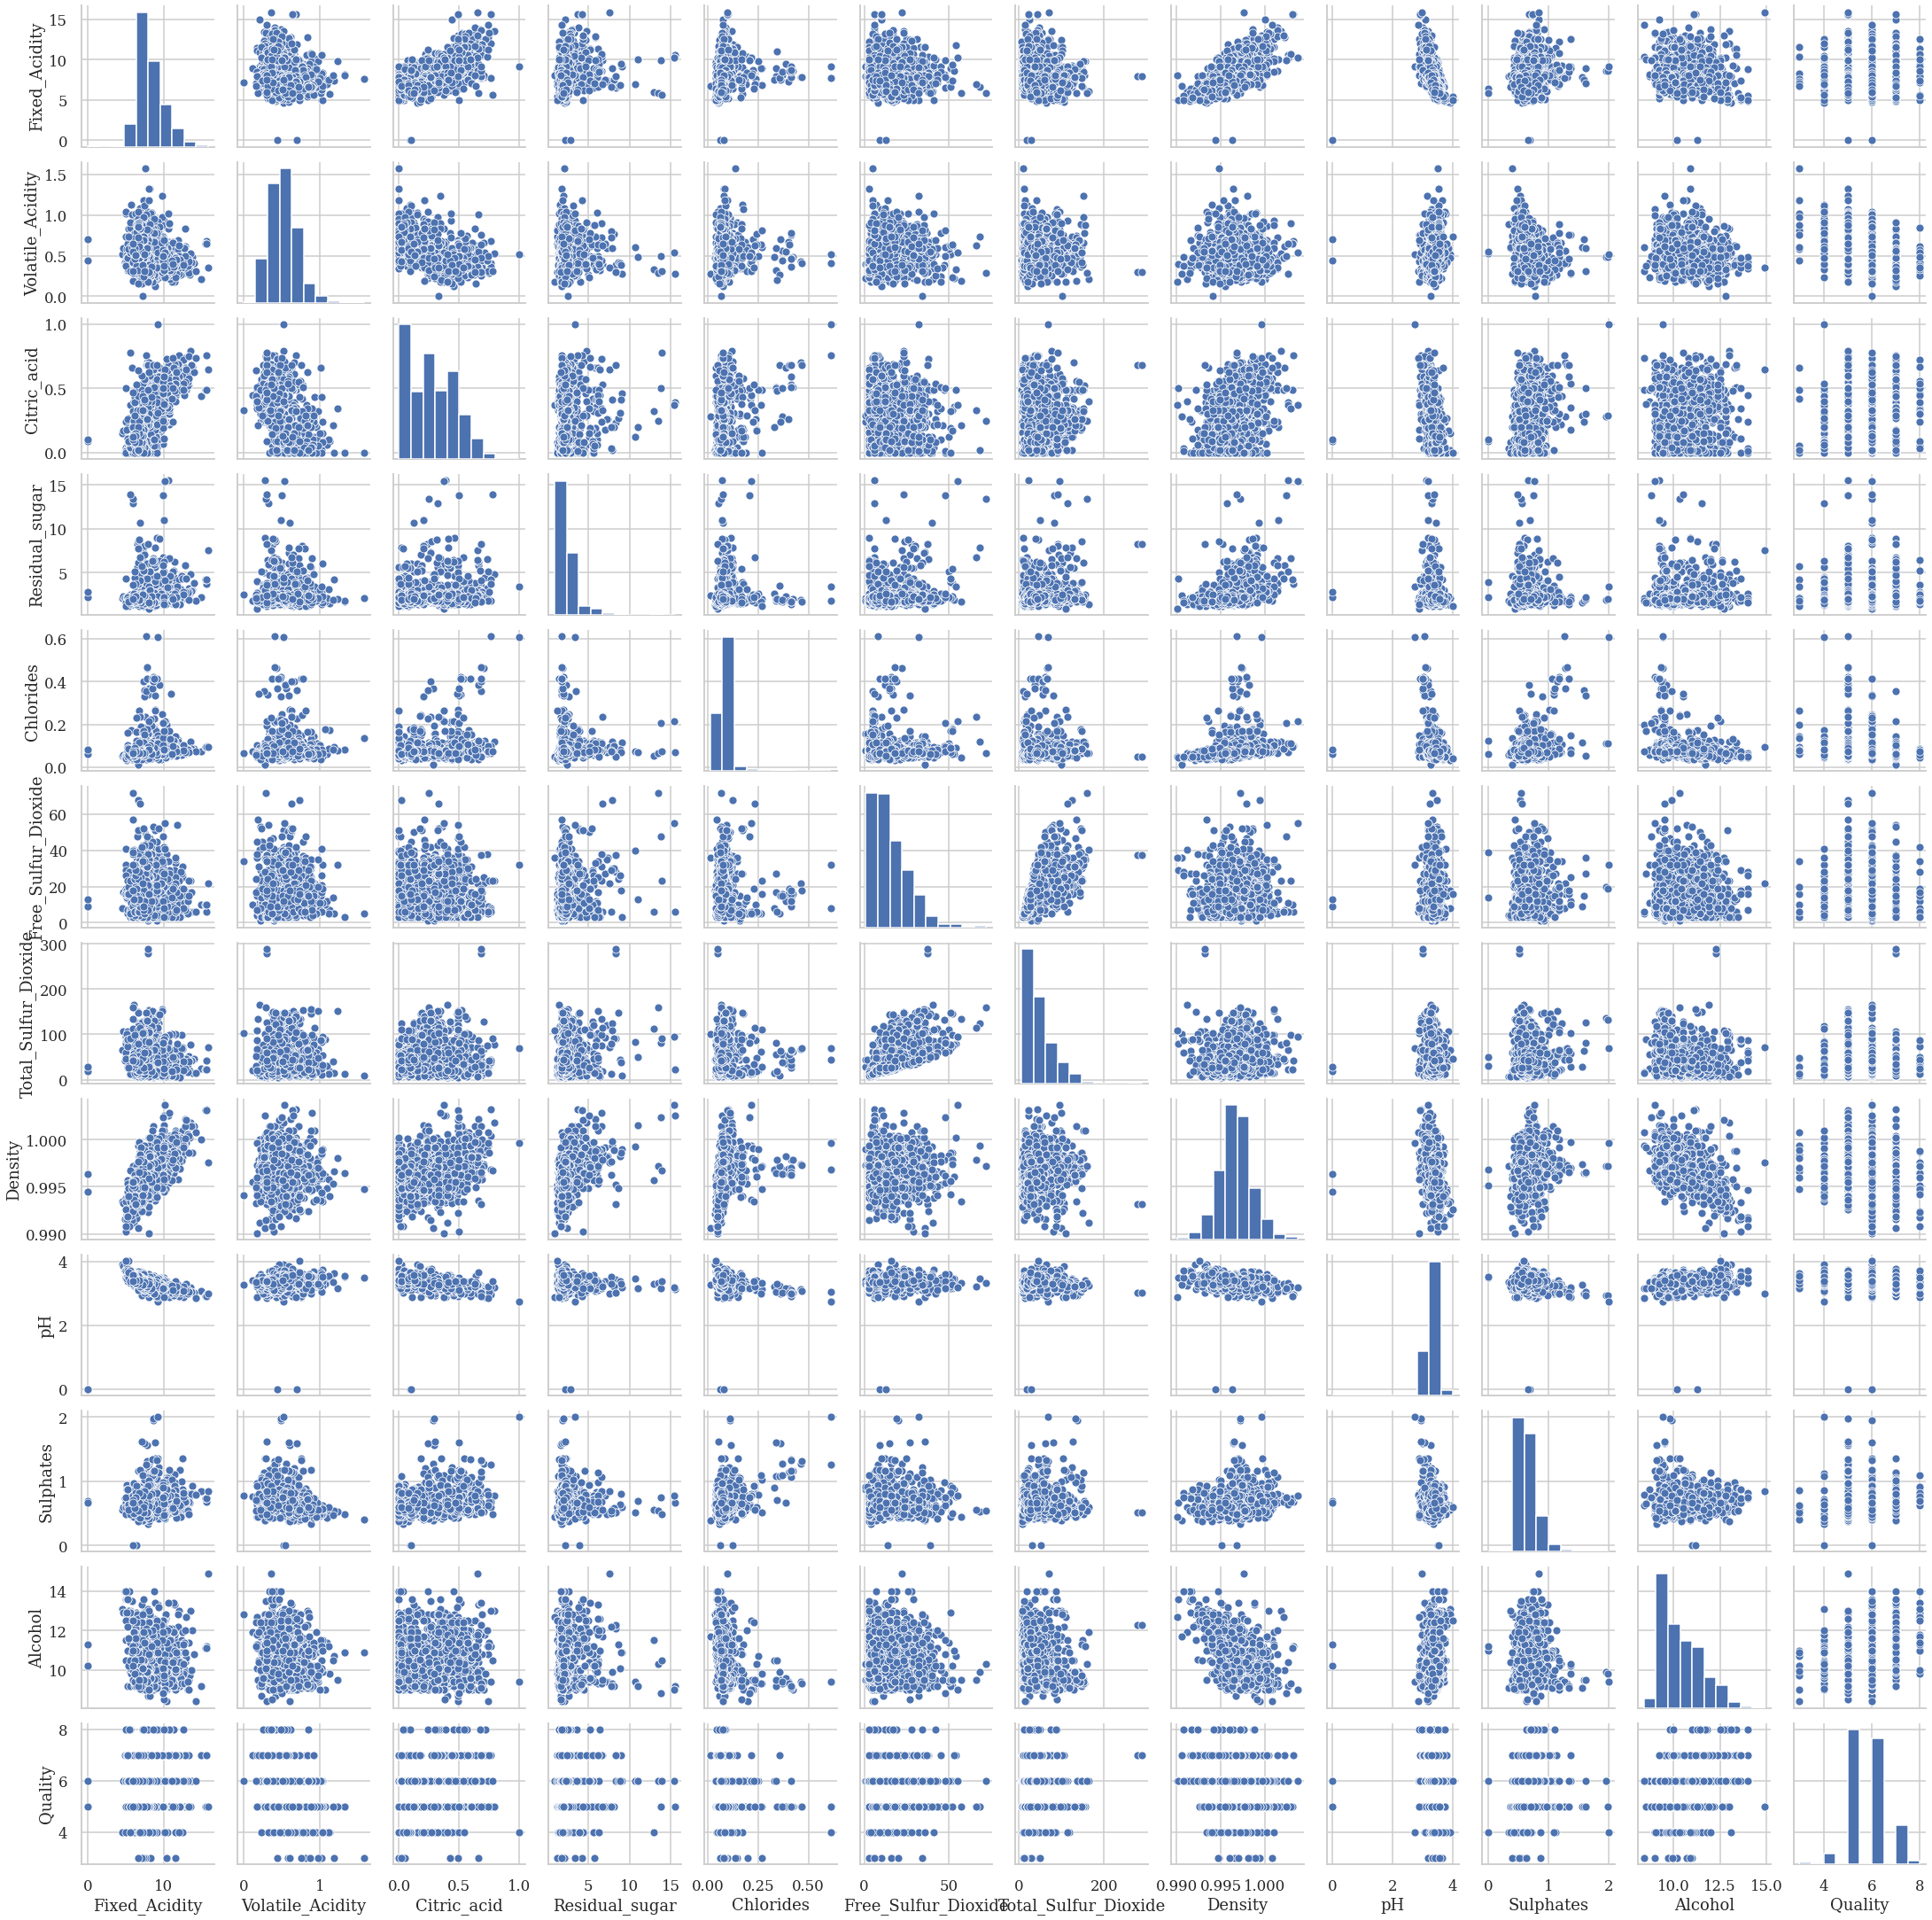

In [19]:
# Lets look into red wine little more closer

sns.pairplot(red_wine_df );#, height=4, aspect=6

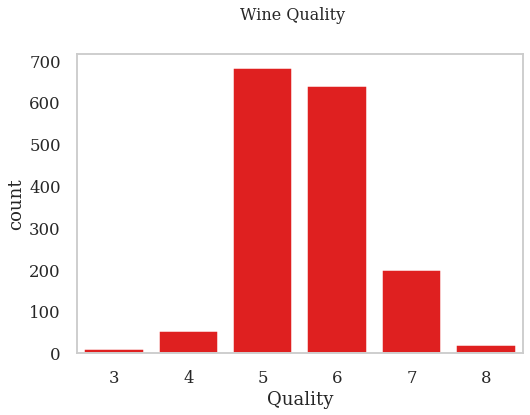

In [20]:
#Count of quality by score

sns.countplot( x ='Quality', data = red_wine_df, color='red')

plt.suptitle('Wine Quality', x=.50, y=1., fontsize=16); 
plt.grid(False)



In [21]:
#Let's drop the column 'Type' (categorical value)

final_red_wine_df = red_wine_df.drop(columns ="Type")
final_red_wine_df

,Fixed_Acidity,Volatile_Acidity,Citric_acid,Residual_sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
4898,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.00,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


R^2 increased from .29 to .36 just by separting wine by color

### Relationship between features vs Quality

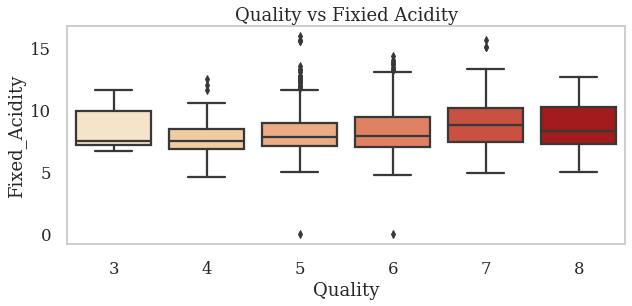

In [22]:
#Fixed Acidity doesn't give much information on Quality

fig = plt.figure(figsize = (10,4))
fig = plt.title('Quality vs Fixied Acidity')
sns.boxplot(x = 'Quality', y = 'Fixed_Acidity', data = final_red_wine_df, palette="OrRd")
plt.grid(False)

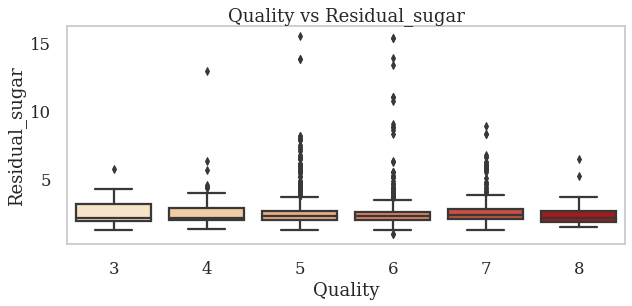

In [23]:
#Residual Sugar doesn't give much infoamation on quality as well 

fig = plt.figure(figsize = (10,4))
fig = plt.title('Quality vs Residual_sugar')
sns.boxplot(x = 'Quality', y = 'Residual_sugar', data = final_red_wine_df, palette="OrRd")
plt.grid(False)

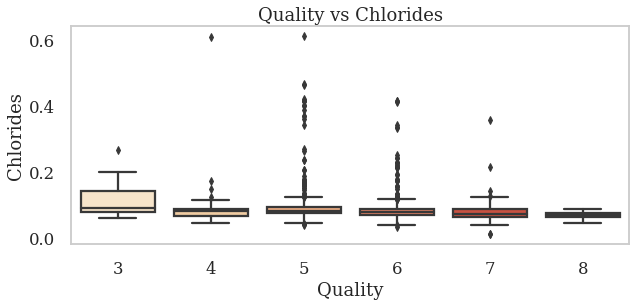

In [24]:
# Here we can see tht lower the quality higher the Chlorides 

fig = plt.figure(figsize = (10,4))
fig = plt.title('Quality vs Chlorides')
sns.boxplot(x = 'Quality', y = 'Chlorides', data = final_red_wine_df, palette="OrRd")
plt.grid(False)

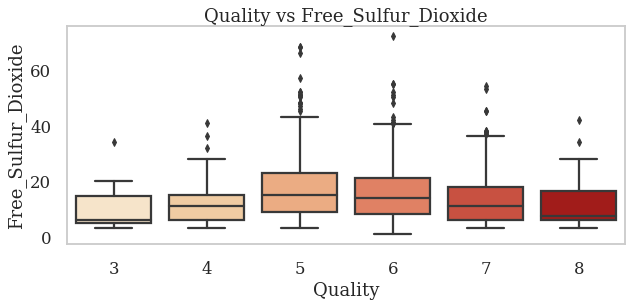

In [25]:
# Here we can see the Free Sulfer Dioxide and Total Sulfer Dioxide 
# has similar affect on wine Quality. Lower and higher quality of wine
# has lower level of Sulfur Dioxide

fig = plt.figure(figsize = (10,4))
fig = plt.title('Quality vs Free_Sulfur_Dioxide')
sns.boxplot(x = 'Quality', y = 'Free_Sulfur_Dioxide', data = final_red_wine_df, palette="OrRd")
plt.grid(False)

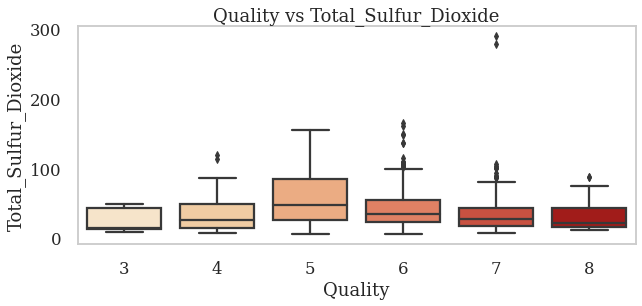

In [26]:
# Here we can see the Free Sulfer Dioxide and Total Sulfer Dioxide has similar affect on wine Quality. 

fig = plt.figure(figsize = (10,4))
fig = plt.title('Quality vs Total_Sulfur_Dioxide')
sns.boxplot(x = 'Quality', y = 'Total_Sulfur_Dioxide', data = final_red_wine_df, palette="OrRd")
plt.grid(False)

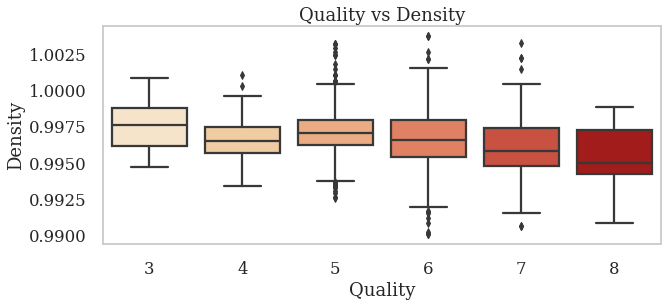

In [27]:
# Density is lower with the better wine quality 
fig = plt.figure(figsize = (10,4))
fig = plt.title('Quality vs Density')
sns.boxplot(x = 'Quality', y = 'Density', data = final_red_wine_df, palette="OrRd")
plt.grid(False)

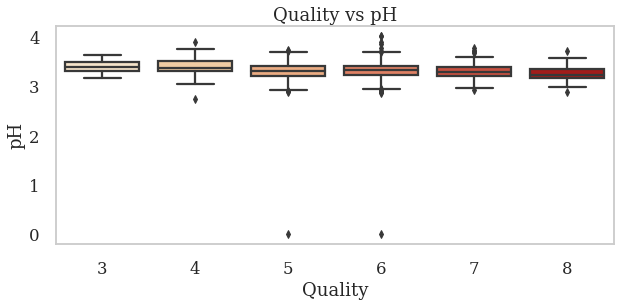

In [28]:
# pH is does not give much detail on the Quallity. 

fig = plt.figure(figsize = (10,4))
fig = plt.title('Quality vs pH')
sns.boxplot(x = 'Quality', y = 'pH', data = final_red_wine_df, palette="OrRd")
plt.grid(False)

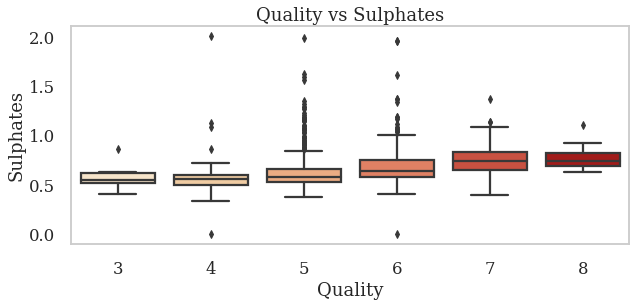

In [29]:
# Higher the Sulphates the higher the quality of the wine


fig = plt.figure(figsize = (10,4))
fig = plt.title('Quality vs Sulphates')
sns.boxplot(x = 'Quality', y = 'Sulphates', data = final_red_wine_df, palette="OrRd")
plt.grid(False)

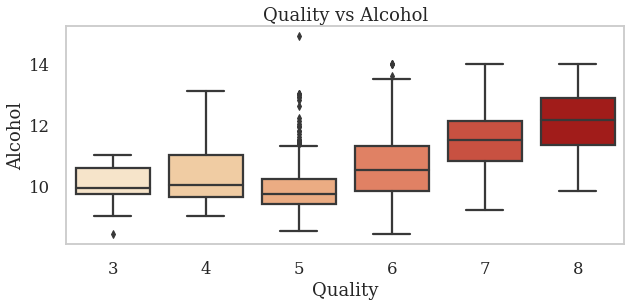

In [30]:
# Same for Alcohol higher the Alcohol the higher the quality of the wine

fig = plt.figure(figsize = (10,4))
fig = plt.title('Quality vs Alcohol')
sns.boxplot(x = 'Quality', y = 'Alcohol', data = final_red_wine_df, palette="OrRd")
plt.grid(False)

In [31]:
# Details on all numerica values


final_red_wine_df.describe()

,Fixed_Acidity,Volatile_Acidity,Citric_acid,Residual_sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.311695,0.527408,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.306723,0.657255,10.422983,5.636023
std,1.764383,0.179515,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.193592,0.171077,1.065668,0.807569
min,0.000000,0.000000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,0.000000,0.000000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Visualizing Correlation 

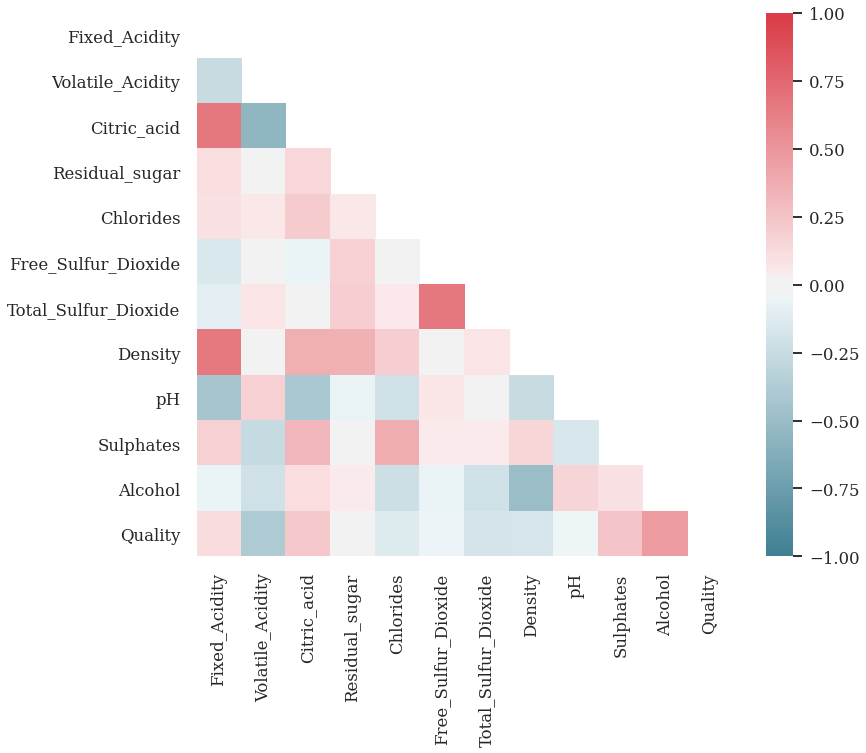

In [32]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(final_red_wine_df.corr(), dtype=np.bool))
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(final_red_wine_df.corr(), cmap=cmap, mask=mask, vmin=-1, vmax=1);

The above correlation map shows possible multicollinearity between: Citric_acid & Fixed_Acidity, Density & Fixid_Acidity, Total_Sulfer& free_sulfer. Also, strong inverse correlation seen between Alchol & Density, Citric_acid & Volatile_Acidity.

In [33]:
# Creating feature list 

features = ['Fixed_Acidity','Residual_sugar', 'Chlorides', 'Free_Sulfur_Dioxide','Total_Sulfur_Dioxide','Density','pH', 'Sulphates','Alcohol']

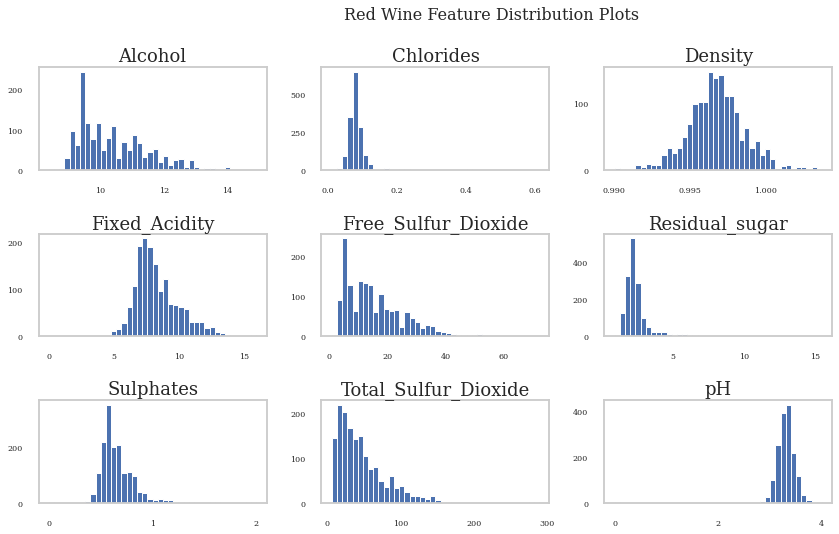

In [34]:
# Feature Distributions. Mostly normal distributions except Free_Sulfur_Dioxide and Total_Sulfer_Dioxide 

final_red_wine_df[features].hist(bins=40, linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False, figsize=(10,6))    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Feature Distribution Plots', x=0.70, y=1.25, fontsize=16);  



In [35]:
#Red wine R^2 =0.36 for using Stats model (exploratory model)

y, X = patsy.dmatrices('Quality ~ Fixed_Acidity + Volatile_Acidity + Citric_acid + Residual_sugar + Chlorides + Free_Sulfur_Dioxide + Total_Sulfur_Dioxide +Density+ pH + Sulphates + Alcohol', 
                       data=final_red_wine_df, return_type="dataframe")

# Create your model
model1 = sm.OLS(y, X)

# Fit your model to your training set
fit1 = model1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     81.13
Date:                Tue, 10 Nov 2020   Prob (F-statistic):          3.82e-145
Time:                        22:15:48   Log-Likelihood:                -1569.9
No. Observations:                1599   AIC:                             3164.
Df Residuals:                    1587   BIC:                             3228.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               40.5635     17.822      2.276      0.023       5.607      75.520
Fixed_Acidity            0.0542      0.018      2.963      0.003       0.018       0.090
Volatile_Acidity        -1.0749      0.121     -8.906      0.000      -1.312      -0.838
Citric_acid             -0.1827      0.147     -1.242      0.214      -0.471       0.106
Residual_sugar           0.0244      0.014      1.712      0.087      -0.004       0.052
Chlorides               -1.7415      0.408     -4.263      0.000      -2.543      -0.940
Free_Sulfur_Dioxide      0.0041      0.002      1.895      0.058      -0.000       0.008
Total_Sulfur_Dioxide    -0.0031      0.001     -4.364      0.000      -0.005      -0.002
Density                -37.5227     17.932     -2.092      0.037     -72.696      -2.350
pH                      -0.1413      0.100     -1.417      0.157      -0.337       0.054
Sulphates                0.9461      0.112      8.439      0.000       0.726       1.166
Alcohol                  0.2547      0.023     10.956      0.000       0.209       0.300
==============================================================================
Omnibus:                       29.657   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.464
Skew:                          -0.175   Prob(JB):                     1.34e-10
Kurtosis:                       3.748   Cond. No.                     9.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# Let's drop Total Sulfer Acidity since it is very similar to Free_sulfer and strong colinearity possible
# Also, I will drop the Fixed_Acidity 

df = final_red_wine_df.drop(['Total_Sulfur_Dioxide', 'Density'], axis=1)

In [37]:
#Red wine R^2 =0.36 for using Stats model (exploratory model)

y2, X2 = patsy.dmatrices('Quality ~ Fixed_Acidity + Volatile_Acidity + Citric_acid + Residual_sugar + Chlorides + Free_Sulfur_Dioxide + pH + Sulphates + Alcohol', 
                       data=df, return_type="dataframe")

# Create your model
model2 = sm.OLS(y2, X2)

# Fit your model to your training set
fit2 = model2.fit()

# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Quality   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     95.37
Date:                Tue, 10 Nov 2020   Prob (F-statistic):          2.97e-142
Time:                        22:15:48   Log-Likelihood:                -1581.3
No. Observations:                1599   AIC:                             3183.
Df Residuals:                    1589   BIC:                             3236.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.9639      0.401      7.386      0.000       2.177       3.751
Fixed_Acidity           0.0414      0.013      3.089      0.002       0.015       0.068
Volatile_Acidity       -1.2236      0.117    -10.447      0.000      -1.453      -0.994
Citric_acid            -0.3569      0.143     -2.498      0.013      -0.637      -0.077
Residual_sugar          0.0033      0.012      0.272      0.785      -0.020       0.027
Chlorides              -1.5373      0.409     -3.760      0.000      -2.339      -0.735
Free_Sulfur_Dioxide    -0.0019      0.002     -1.170      0.242      -0.005       0.001
pH                     -0.1593      0.098     -1.630      0.103      -0.351       0.032
Sulphates               0.8697      0.110      7.906      0.000       0.654       1.086
Alcohol                 0.3052      0.017     18.105      0.000       0.272       0.338
==============================================================================
Omnibus:                       22.766   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.153
Skew:                          -0.133   Prob(JB):                     3.83e-08
Kurtosis:                       3.665   Cond. No.                         623.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By droping the possible collinear features R^2 did not change much 

### Split the data for train and test for validation

In [38]:
X = df.iloc[:, 0:-1] # numerical columns
y = df.iloc[:, -1] # number of reviews

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Validation

In [40]:
lm = LinearRegression()
lm_scores = cross_val_score(lm, X_train, y_train, cv=5, scoring="r2")
print("R^2 scores: ", lm_scores)
print("Mean R^2: ", np.mean(lm_scores), "+-", np.std(lm_scores))

R^2 scores:  [0.25172511 0.29244567 0.26900417 0.33938803 0.43598958]
Mean R^2:  0.31771050961242187 +- 0.06606745967867245


In [41]:
ridge_model = Ridge(alpha=1)
ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring="r2")
print("R^2 scores: ", ridge_scores)
print("Mean R^2: ", np.mean(ridge_scores), "+-", np.std(ridge_scores))

R^2 scores:  [0.25275378 0.2932706  0.27049559 0.33352922 0.44004443]
Mean R^2:  0.318018722329154 +- 0.06672522659232868


Similar result with both simple Linear Regression and Ridge regression very low variance so, we can use simple linear regression

In [42]:
# Calculate VIF Factors to check colleniarity 


vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

In [43]:
# Intercept is the Expected mean value of Y when all X=0. Looking at the 
#result between pH and Alcohol there might be possible colinearity

vif.round(1)

,VIF Factor,features
0,39.2,Fixed_Acidity
1,15.5,Volatile_Acidity
2,8.5,Citric_acid
3,4.6,Residual_sugar
4,6.0,Chlorides
5,3.6,Free_Sulfur_Dioxide
6,134.1,pH
7,20.7,Sulphates
8,103.1,Alcohol


/Users/unachka/opt/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


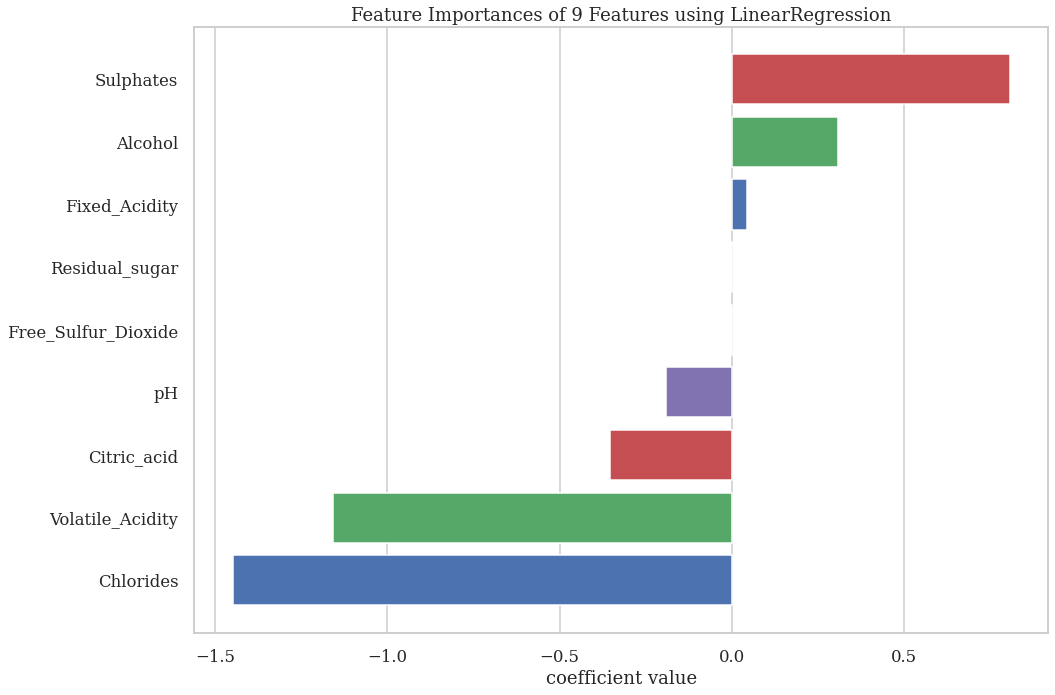

In [44]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 10), facecolor='w')
visualizer = FeatureImportances(lm, relative=False)
visualizer.fit(X_train, y_train)
visualizer.show();

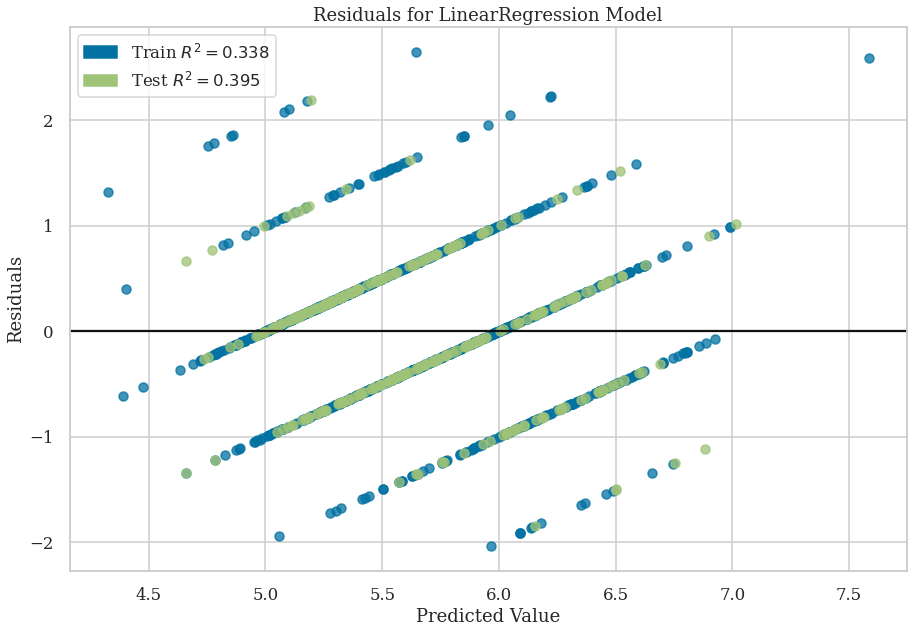

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [45]:
figure(num=None, figsize=(15, 10))
visualizer = ResidualsPlot(lm, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [46]:
alphas = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphas, cv=5, random_state=42)
lasso_model.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5, random_state=42)

In [47]:
lasso_model.alpha_

0.01

In [48]:
print("R^2: ", lasso_model.score(X_train, y_train))

R^2:  0.3191688259017089


In [49]:
list(zip(X_train.columns, lasso_model.coef_))

[('Fixed_Acidity', 0.03796545317754133),
 ('Volatile_Acidity', -0.8183804573944234),
 ('Citric_acid', -0.0),
 ('Residual_sugar', -0.006036313605316375),
 ('Chlorides', -0.0),
 ('Free_Sulfur_Dioxide', -0.0007469467853182187),
 ('pH', -0.0),
 ('Sulphates', 0.3354414304446747),
 ('Alcohol', 0.3223245730420845)]

Citric_Acid, Cholorides,and pH are zero when we used Lasso model. 

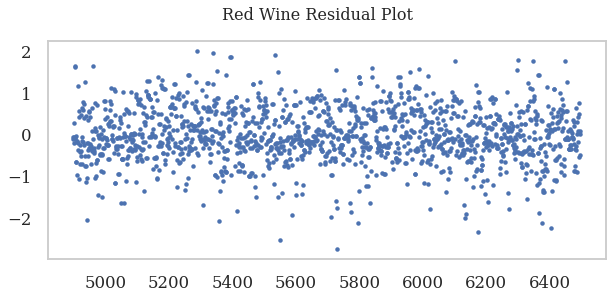

In [50]:
# Residual model plotting which looks random

fit1.resid.plot(x ="number of wine", y = "distribution", style ='.', figsize =(10,4), grid=False);
plt.suptitle('Red Wine Residual Plot', x=0.50, y=1.0, fontsize=16); 

In [65]:
#Simple Validation model for sklean 2nd testing with all features


X, y = final_red_wine_df.drop('Quality', axis =1), final_red_wine_df['Quality']


X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.20, random_state=10)

In [67]:
#sklearn model 
#set up the 2 models we're choosing from:

lm = LinearRegression()

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [68]:
#validate

#Polynomial regression is a better model when using sklearn but not much difference. I think it is best to keep the Linear regression model

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.361
Degree 2 polynomial regression val R^2: 0.384


In [69]:
#Test

# Testing shows that Polynomial Regression model better 

print(f'Poly Regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

#lm.fit(X,y) - old set 

print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Poly Regression test R^2: 0.349
Linear Regression test R^2: 0.373


In [56]:
lm.fit(X_train, y_train)

print("Training accuracy :", lm.score(X_train, y_train))
print("Testing accuracy :", lm.score(X_test, y_test))

Training accuracy : 0.34847948788431893
Testing accuracy : 0.37280037258892096


In [57]:
# Removing feature lowers the r^2
y4, X4 = patsy.dmatrices('Quality ~ Fixed_Acidity  + Citric_acid + Residual_sugar + Chlorides + Free_Sulfur_Dioxide  +Density+ pH + Sulphates ', data=final_red_wine_df, return_type="dataframe")



# Create your model
model4 = sm.OLS(y, X)

# Fit your model to your training set
fit4 = model1.fit()

# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     81.13
Date:                Tue, 10 Nov 2020   Prob (F-statistic):          3.82e-145
Time:                        22:15:50   Log-Likelihood:                -1569.9
No. Observations:                1599   AIC:                             3164.
Df Residuals:                    1587   BIC:                             3228.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               40.5635     17.822      2.276      0.023       5.607      75.520
Fixed_Acidity            0.0542      0.018      2.963      0.003       0.018       0.090
Volatile_Acidity        -1.0749      0.121     -8.906      0.000      -1.312      -0.838
Citric_acid             -0.1827      0.147     -1.242      0.214      -0.471       0.106
Residual_sugar           0.0244      0.014      1.712      0.087      -0.004       0.052
Chlorides               -1.7415      0.408     -4.263      0.000      -2.543      -0.940
Free_Sulfur_Dioxide      0.0041      0.002      1.895      0.058      -0.000       0.008
Total_Sulfur_Dioxide    -0.0031      0.001     -4.364      0.000      -0.005      -0.002
Density                -37.5227     17.932     -2.092      0.037     -72.696      -2.350
pH                      -0.1413      0.100     -1.417      0.157      -0.337       0.054
Sulphates                0.9461      0.112      8.439      0.000       0.726       1.166
Alcohol                  0.2547      0.023     10.956      0.000       0.209       0.300
==============================================================================
Omnibus:                       29.657   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.464
Skew:                          -0.175   Prob(JB):                     1.34e-10
Kurtosis:                       3.748   Cond. No.                     9.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
#Simple Validation model for sklean 2nd testing
X2, y2 = final_red_wine_df.drop('Quality', axis =1), final_red_wine_df['Quality']


X2, X2_test, y2, y2_test = train_test_split(X2, y2, test_size=.20, random_state=20)

In [59]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=.20, random_state=20)

In [60]:
#Checking with 3 models


lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X2_train_scaled = scaler.fit_transform(X2_train.values)
X2_val_scaled = scaler.transform(X2_val.values)
X2_test_scaled = scaler.transform(X2_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X2_train_poly = poly.fit_transform(X2_train.values)
X2_val_poly = poly.transform(X2_val.values)
X2_test_poly = poly.transform(X2_test.values)

lm_poly = LinearRegression()

In [61]:
#validate

#Linear regression is a better model

lm.fit(X2_train, y2_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X2_train_scaled, y2_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X2_val_scaled, y2_val):.3f}')

lm_poly.fit(X2_train_poly, y2_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X2_val_poly, y2_val):.3f}')

Linear Regression val R^2: 0.375
Ridge Regression val R^2: 0.273
Degree 2 polynomial regression val R^2: -12.568


In [62]:

lm.fit(X2,y2) 
print(f'Linear Regression test R^2: {lm.score(X2_test, y2_test):.3f}')

Linear Regression test R^2: 0.340


In [63]:
#  KFold # Regression 

X, y = final_red_wine_df.drop('Quality',axis=1), final_red_wine_df['Quality']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below


In [64]:

X, y = np.array(X), np.array(y)

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.40698613956063645, 0.35642838472844574, 0.27971419702314504, 0.34810015075945544, 0.25914542546085184]
Ridge scores:  [0.40695792138499165, 0.3564076340553489, 0.27982013377561565, 0.34805892369601166, 0.2593622523365343] 

Simple mean cv r^2: 0.330 +- 0.054
Ridge mean cv r^2: 0.330 +- 0.054
